In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
%matplotlib inline
from termcolor import colored
from IPython.display import display, HTML

# Tactical Proficiencies Among Titled Chess Players

<br>    This report contains an analysis of play styles of titled players (chess masters) on chess.com, as indicated by their performance on various 'tactics puzzles'. 

## What do I want to learn?
#### Overall, what are the strengths and weaknesses for all players in the dataset?
#### What sort of distribution do the titles have, as far as membership?
#### How do these groups compare in average success rate?
#### Between the groups, which tactics were the most improved on, and did any seem less important to stronger players?
The data was scraped from the tactics stats page of 5,770 of these players. Each puzzle has been user-tagged to denote the tactical knowledge required to solve it. A  puzzle can have multiple tags, and the stats page enumerates a 'pass' or 'fail' every time a tag is encountered by the player.
    Some tactics earned the tag of 'Is this a good tactic?' Meaning that the puzzle was possibly flawed, and therefore the result may be a false negative, and likely some few were flawed to the players benefit, too, meaning there might be some false positives. However, the proportion of bad puzzles is negligibly small.
    This is how the titled players on chess.com fared on each of the types of tactics:</br>

Text(0.5, 0, 'Frequency of Success')

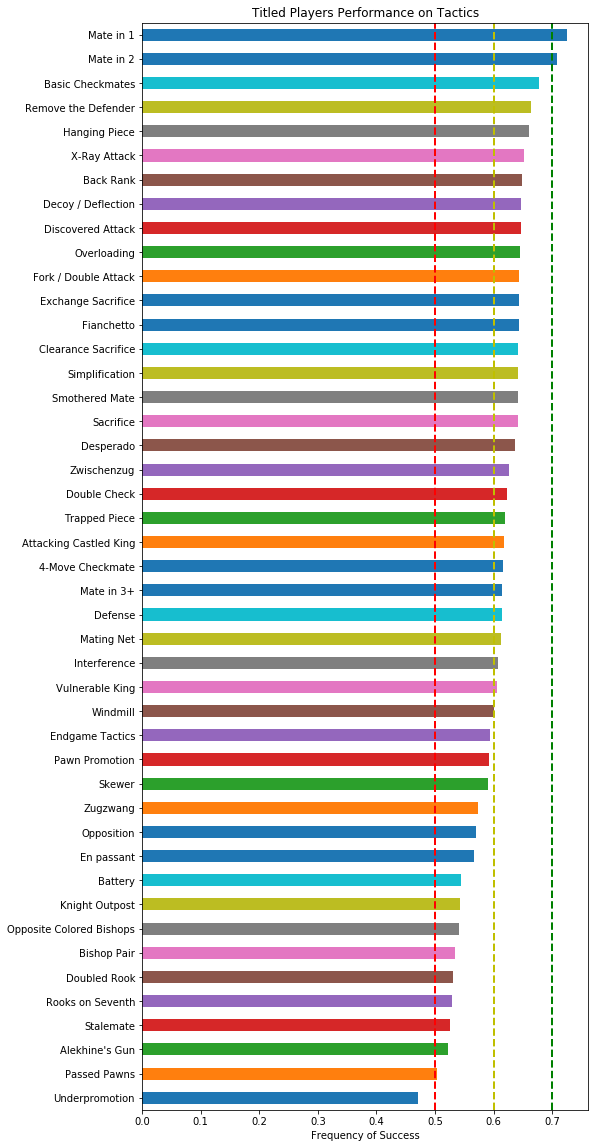

In [11]:
i = 2
df = pd.read_csv('my_data.csv')
while i < 98:
    combinedName = df.columns[i][:-7]

    df[combinedName] = df.iloc[:,i] / (df.iloc[:,i] + df.iloc[:,i+1]) 
    df[combinedName] = df[combinedName].replace([np.inf, -np.inf], np.nan)
    i = i + 2

aggregateRatios = df.iloc[:,98:].aggregate(np.mean)
aggregateRatios= aggregateRatios.sort_values()

aggregateRatios.plot.barh(figsize = (8,20))
plt.axvline(.5, color='r', linestyle='dashed', linewidth=2) 
plt.axvline(.6, color='y', linestyle='dashed', linewidth=2)
plt.axvline(.7, color='g', linestyle='dashed', linewidth=2)
plt.title('Titled Players Performance on Tactics' , fontdict=None, loc='center', pad=None)
plt.xlabel('Frequency of Success')

<p>The overall performance on tactics for all titled players shows that they can read the board, and spot the intended (opportune) tactic, greater than 50% of the time, for all tactics but underpromotion. This means that in puzzles, masters did not see the real need to underpromote (i.e. to prevent a stalemate) in more than half of trials.</p>

The titles I am examining are: <br></br><br></br>
Grandmaster (GM)<br></br>
International Master (IM)<br></br>
FIDE Master (FM)<br></br>
Candidate Master (CM)<br></br>
National Master (NM)<br></br>
Woman Grandmaster (WGM)<br></br>
Woman International Master (WIM)<br></br>
Woman FIDE Master (WFM)<br></br>
Woman Candidate   (WCM)<br></br>
Woman National Master (WNM)<br></br>
#### Chess Titles Explanation
<p>
The Grandmaster title is given to the highest level of player, and belongs to those whose elo ratings (a metric of chess ability, as demonstrated in proctored tournaments) exceed 2500 and who have performed favorably in 3 tournaments involving other Grandmasters. The title can also be conferred to a player achieving other exceptional milestones, such as winning the World Junior Championship. International Masters are next, and usually have a rating between 2400 and 2500. FIDE Master ranks below the title of International Master but ahead of Candidate Master. FIDE Masters usually have a rating of 2300 or more. The Candidate Master players qualify with a rating above 2200.
</p>
<p>
    While the aforementioned open titles may be obtained by either gender, the women's titles are exclusive to women. These titles generally correspond to an elo rating 200 points less than their unrestricted counterparts. (e.g. 2300 for WGM as opposed to 2500 for GM). Many women choose to display their open title rather than their Women's title. </p>
<p>
    National Master (NM) is a title bestowed by non-FIDE national chess leagues, such as USCF. National Masters are regarded as having equivalent skill to FIDE Candidate Masters.
</p>
    Here is a breakdown of the entire set of chess.com titled players, counting the membership of each group:</br>

Text(0.5, 1.0, 'Member Count by Title')

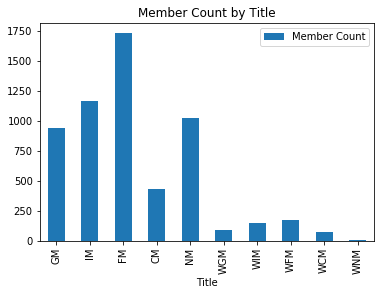

In [15]:
groupMembership = pd.DataFrame(df.groupby('Title')['Title'].count(), index = ["GM", "IM", "FM", "CM", "NM","WGM", "WIM", "WFM", "WCM", "WNM"])
groupMembership.index.name = 'Title'
groupMembership.columns = ['Member Count']
groupMembership.plot.bar()
plt.title('Member Count by Title')

<p>We can see that FIDE Masters are the most common type of Master. As I mentioned before, women in the dataset may be choosing to display their general title, rather than their women exclusive title, so the latter grouping is a subset of the female players in the dataset.</p>

<p>Here is how the groups compare in their performance on tactics puzzles, by their average success rate:</p>

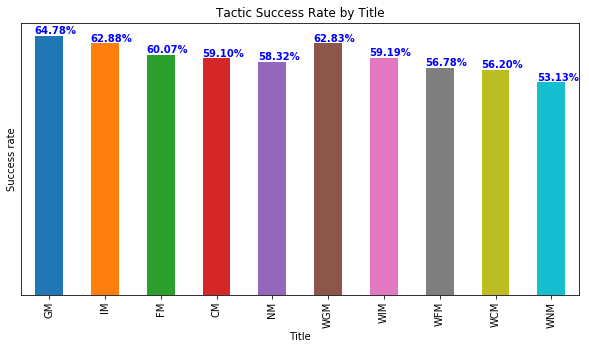

In [16]:
groupedMasters = pd.DataFrame(df.groupby('Title').aggregate(np.mean), index = ["GM", "IM", "FM", "CM", "NM","WGM", "WIM", "WFM", "WCM", "WNM"])
groupedMastersRatios = groupedMasters.iloc[:,96:].aggregate(np.mean, axis = 1)
groupedMastersRatios.index.name = 'Title'
groupedMastersRatios.plot.bar(figsize=(10,5))
plt.ylabel("Success rate")
plt.yticks([])
plt.title('Tactic Success Rate by Title')
for i, v in enumerate(groupedMastersRatios):
    plt.text(i-.26, v +.005 , str(v)[2:4]+ "." + str(v)[4:6] + "%", color='blue', fontweight='bold')

<p> In general, there a positive association between stronger chess title and tactical skill. </p>

<p> Which specific areas do we see the most improvement (or apparent deficiencies) as we move from CM to GM?
</p>
<p>
For this I reported the percentile for each change in probability of success, giving us a picture of the relative change in each tactic. All changes in tactics are listed in descending order (from most improved), and any that lost representation (had more observed failures) are relisted after.
</p>
</br>

In [23]:
groupedData = groupedMasters.iloc[:,96:]

cmtofm = pd.DataFrame(groupedData.loc['FM'] - groupedData.loc['CM'])
cmtofm.name = 'Changes between Candidate Master and FIDE Master'
fmtoim = pd.DataFrame(groupedData.loc['IM'] - groupedData.loc['FM'])
fmtoim.name = 'Changes between FIDE Master and  International Master'
imtogm = pd.DataFrame(groupedData.loc['GM'] - groupedData.loc['IM'])
imtogm.name = 'Changes between International Master and Grandmaster'
cmtogm = pd.DataFrame(groupedData.loc['GM'] - groupedData.loc['CM'])
cmtogm.name = 'Changes between Candidate Master and Grandmaster'

differenceArray = [cmtofm, fmtoim, imtogm, cmtogm]

for dataList in differenceArray:
    print(dataList.name)
    changes = (dataList[0] - dataList[0].mean()) / dataList[0].std(ddof=0)
    changes= pd.DataFrame(changes.sort_values(ascending = False))
    changes[0] = st.norm.cdf(changes[0])
    changes.columns = ['Percentile']
    display(HTML(changes.to_html()))
    print('Deteriorations')
    decreases = (dataList[dataList[0] < 0][0] - dataList[0].mean()) / dataList[0].std(ddof=0)
    decreases = pd.DataFrame(decreases.sort_values())
    decreases[0] = st.norm.cdf(decreases[0])
    decreases.columns = ['Percentile']
    display(HTML(decreases.to_html()))


Changes between Candidate Master and FIDE Master


,P-Value
Alekhine's Gun,0.995291
Opposition,0.909523
Battery,0.900830
Mate in 1,0.841757
Basic Checkmates,0.835696
Double Check,0.820515
Hanging Piece,0.762101
Zwischenzug,0.760957
Desperado,0.734376
Zugzwang,0.713876


Deteriorations


,P-Value
Doubled Rook,0.001748
Passed Pawns,0.002530
Knight Outpost,0.014904
Rooks on Seventh,0.052691
Opposite Colored Bishops,0.086253
Bishop Pair,0.108282
Smothered Mate,0.281018


Changes between FIDE Master and  International Master


,P-Value
Alekhine's Gun,1.000000
Fianchetto,0.963674
Underpromotion,0.815291
Opposite Colored Bishops,0.778216
Stalemate,0.731494
Windmill,0.724391
X-Ray Attack,0.714377
Pawn Promotion,0.688170
Interference,0.644221
Endgame Tactics,0.640501


Deteriorations


,P-Value
Knight Outpost,0.037911
Opposition,0.051499


Changes between International Master and Grandmaster


,P-Value
Stalemate,0.974388
Fianchetto,0.970257
Zugzwang,0.925629
Underpromotion,0.920525
Double Check,0.852505
Interference,0.809509
En passant,0.807526
Smothered Mate,0.785586
Pawn Promotion,0.777256
Sacrifice,0.751751


Deteriorations


,P-Value
Alekhine's Gun,0.000497
Rooks on Seventh,0.002014
Windmill,0.074643
Passed Pawns,0.117945
Mate in 1,0.122371
Opposition,0.130200
Desperado,0.172587


Changes between Candidate Master and Grandmaster


,P-Value
Alekhine's Gun,0.989256
Fianchetto,0.977252
Stalemate,0.952225
Underpromotion,0.934727
Zugzwang,0.854266
Double Check,0.814625
Interference,0.745511
Sacrifice,0.730238
Pawn Promotion,0.702996
Endgame Tactics,0.699422


Deteriorations


,P-Value
Rooks on Seventh,0.001094
Passed Pawns,0.013517
Knight Outpost,0.014556
Bishop Pair,0.069660


<p>    Here, the percentile is describing the specialness in each change in performance. A percentile close to 1 or 0 represents a tactic that did not change according to the mean change in proficiency, instead being especially improved or especially hindered, respectively.
</p>
<p>
As I noted before, some puzzles may have been created inaccurately. As seen in the data, there are certain tactics, such as rooks on seventh, which is simply moving the rooks up the board, that are less favored the higher the player's level.</p>
<p>
    Overall, the improvements I see are in tactics that require full awareness of the opponents moves, such as underpromotion, where promoting to a queen would mean creating a stalemate situation.
</p>
<p>
    For future research, I would conduct a study, to investigate the ability to learn chess from puzzles. I would select a sample of younger players to older ones and compare the different associations between puzzles completed and elo rating Then,  I would perform a unequal variances t-test to hypothosize whether the two populations have equal means.
</p>